# Testing Alpha Update upon Positive Attestations

An agent executes a positive attestation when they desire to increase the system alpha closer in magnitude to their private belief of alpha.

To make a positive attestation, the agent bonds $\Delta s$ quantity of supply tokens to the $S_1$ bucket. In exchange, they get $\Delta q_1$ quantity of positive claims. 


$$\alpha_{t+1} = (\epsilon) \alpha + (1-\epsilon)\cdot(1-\delta) \alpha + (1-\epsilon).(\delta) \bar\alpha$$
<br/> where $\epsilon$ is the designer-defined fixed weight between [0,1] and $\delta=\frac{\Delta s}{S_1+S_0+\Delta s}$ is the dynamic weight.


The realized alpha, $\bar\alpha$ is given by $$\bar\alpha = \frac{\Delta s}{S} \frac{R}{B}$$ 
<br/> where $B = (C+R)\left[\frac{q_1+\Delta q_1}{Q_1+\Delta q1}\frac{S_1+\Delta S}{S}-\frac{q_1}{Q_1}\frac{S_1}{S}\right]-(C)\left[\frac{\Delta s}{S}\right]$


In the following tests, we want to verify if the update in alpha is directionally correct - i.e we see an increase with each positive attestaion - and if the resultant system alpha is within its domain [0,1].

### Test criteria

The tests below must produce results that satisfy the below criteria. 

#### Alpha Update
For an attestation $\Delta s \rightarrow S_1$, where $\Delta s \geq 0$, 
- $ \alpha_{t+1} \in [0,1] $
- The realized alpha $\bar\alpha \geq \alpha_{t}$
- The computed $\alpha_{t+1} \geq \alpha_{t}$

#### State Variable Updates
Several state variables are computed in these tests. The following domains may be asserted on the state variables.

- $ S \in [0, \infty) $
- $ Q_1 \in [0, \infty) $
- $ S_1 \in [0, S] \space | \space S_1 = S - S_0 - S_free $
- $ S_0 \in [0, S] \space | \space S_0 = S - S_1 - S_free $
<br/> <br/>
- $ s \in [0, S] $
- $ q_1 \in [0, Q_1] $
- $ s_1 \in [0, S_1] $


### Intitialize state variables

In [51]:
E = 0.46
C = 7000
R = 3000
S = 300

Q1 = [100]
q1 = [0]
S1 = [100] 
S0 = [100]
s1 = [0]
s = [20]

alpha = [0.5]

### Input an agent action signal 
The agent action signal contains a series of $\Delta s$ that they would use to make positive attestations.

In [52]:
deltas = [1, 4, 5, 6, 3, 0, 1]

### Compute $\alpha_{t+1}$ for each agent action event and update state variables

State variables are updated in each iteration
            
- $S \rightarrow S - \Delta s$
- $Q_1 \rightarrow Q_1 + \Delta q$
- $Q_0 \rightarrow Q_0$
- $S_1 \rightarrow S_1 + \Delta s$
- $S_0 \rightarrow S0 $
<br/> <br/> 
- $s \rightarrow s - \Delta s$
- $q_1 \rightarrow q_1 + \Delta q$
- $q_0 \rightarrow q_0$
- $s_1 \rightarrow s_1 + \Delta s$
- $s_0 \rightarrow s_0$
<br/> <br/> 
- $\alpha_t \rightarrow \alpha_{t+1}$




In [53]:
import math

for i in range(len(deltas)): 
    
    A = 1+(deltas[i]/S)
    deltaq1 = Q1[i]*(math.sqrt(A-1))
        
    if deltas[i] == 0:
        new_alpha = alpha[i]
        print("alpha[i] =", alpha[i], "| new_alpha = ", new_alpha)
        print("____________________________")
    else:   
        attest_prop_after = (q1[i]+deltaq1)/(Q1[i]+deltaq1)
        supply_prop_after = (S1[i]+deltas[i])/S
        attest_supply_prop_before = (q1[i]/Q1[i])*(S1[i]/S)
    
        B = (attest_prop_after*supply_prop_after) - attest_supply_prop_before
              
        pre1 = (C+R)*B
        
        pre2 = (C)*(deltas[i]/S)
        
        alpha_bar = (deltas[i]/S)*(R/(pre1 - pre2))
        
       # pre3 = (deltas[i]/S)*R
       # pre4 = (C+R)*B
       # pre5 = (C)*(deltas[i]/S)
        
       # alpha_bar = pre3 / (pre4 - pre5)
    
        D = deltas[i]/(S0[i]+S1[i]+deltas[i])
    
        T1 = E*alpha[i]
    
        T2 = (1-E)*(1-D)*alpha[i]
    
        T3 = (1-E)*(D)*alpha_bar
    
        new_alpha = T1+T2+T3
    
        print("D = ", D)
        print("alpha_bar = ", alpha_bar)
        print("alpha[i] =", alpha[i], "| new_alpha = ", new_alpha)
        # print("alpha = ", alpha)
        print("deltas =", deltas[i], " | deltaq1 = ", deltaq1)
        print("s[i] =" , s[i])
        print("____________________________")
    
    # Update operations
    Q1.append(Q1[i] + deltaq1)
    S1.append(S1[i] + deltas[i])
    S0.append(S0[i])
    s1.append(s1[i] + deltas[i])
    s.append(s[i] - deltas[i])
    q1.append(deltaq1)
    alpha.append(new_alpha)
    

D =  0.004975124378109453
alpha_bar =  0.06233186571425884
alpha[i] = 0.5 | new_alpha =  0.49882417516162036
deltas = 1  | deltaq1 =  5.773502691896324
s[i] = 20
____________________________
D =  0.01951219512195122
alpha_bar =  0.15595901638002552
alpha[i] = 0.49882417516162036 | new_alpha =  0.4952115471471411
deltas = 4  | deltaq1 =  12.213672050459229
s[i] = 19
____________________________
D =  0.023809523809523808
alpha_bar =  0.18087860549529386
alpha[i] = 0.4952115471471411 | new_alpha =  0.4911701236116173
deltas = 5  | deltaq1 =  15.232078761440219
s[i] = 15
____________________________
D =  0.027777777777777776
alpha_bar =  0.19533272980326338
alpha[i] = 0.4911701236116173 | new_alpha =  0.48673256270449206
deltas = 6  | deltaq1 =  18.84004750742875
s[i] = 10
____________________________
D =  0.0136986301369863
alpha_bar =  0.1161363117318615
alpha[i] = 0.48673256270449206 | new_alpha =  0.4839911657794891
deltas = 3  | deltaq1 =  15.205930101122458
s[i] = 4
_________________

### Component Tests  - June 17

In [9]:
# Set state variables
C = 7000
R = 3000

Q1 = 300
S = 1000
S1 = 500
S0 = 200

q1 = 10
s1 = 13

delta_s = 5

In [10]:
# Calculate delta q
import math

delta_q = Q1*(math.sqrt(1+(delta_s/S))-1)
print("delta_q = ", delta_q)

delta_q =  0.7490648364513186


In [13]:
# Calculate B1 (using S1+delta_s)
attest_prop_after = (q1+delta_q)/(Q1+delta_q)
supply_prop_after = (S1+delta_s)/S
attest_supply_before = (q1/Q1)*(S1/S)

B1 = (C+R)*((attest_prop_after * supply_prop_after) - attest_supply_before) + (C)*(delta_s/S)
print("B1 = ", B1)

B1 =  48.82525756790532


In [14]:
# Calculate B2 (using s1+delta_s)
attest_prop_after = (q1+delta_q)/(Q1+delta_q)
supply_prop_after = (s1+delta_s)/S
attest_supply_before = (q1/Q1)*(s1/S)

B2 = (C+R)*((attest_prop_after * supply_prop_after) - attest_supply_before) + (C)*(delta_s/S)
print("B2 = ", B2)

B2 =  37.10004218393854


In [16]:
# Calculate alpha_bar_1

alpha_bar_1 = (delta_s/S)*(R/B1)
print("alpha_bar_1 = ", alpha_bar_1)

alpha_bar_1 =  0.30721804138233705


In [17]:
# Calculate alpha_bar_2

alpha_bar_2 = (delta_s/S)*(R/B2)
print("alpha_bar_2 = ", alpha_bar_2)

alpha_bar_2 =  0.40431220874713303


#### Trial 2: With using s1+delta_s & attest_prop_after = (q1+delta_q)/(Q)

In [19]:
#Calculate B3 w/ s1+delta_s & attest_prop_after = (q1+delta_q)/(Q)
Q = 300+100

attest_prop_after = (q1+delta_q)/(Q)
supply_prop_after = (s1+delta_s)/S
attest_supply_before = (q1/Q1)*(s1/S)

B3 = (C+R)*((attest_prop_after * supply_prop_after) - attest_supply_before) + (C)*(delta_s/S)
print("B3 = ", B3)

B3 =  35.50374584306976


In [20]:
# Calculate alpha_bar_3

alpha_bar_3 = (delta_s/S)*(R/B3)
print("alpha_bar_3 = ", alpha_bar_3)

alpha_bar_3 =  0.422490631447779


**B should be 30 for alpha_bar to be 0.5**

In [21]:
B4 = 30

# Calculate alpha_bar_4

alpha_bar_4 = (delta_s/S)*(R/B4)
print("alpha_bar_4 = ", alpha_bar_4)

alpha_bar_4 =  0.5


#### Trial 3: With attest_prop_after = (Q1+delta_q)/(Q) & supply_prop_after = (S1+delta_s)/S & attest_supply_before = (Q1/Q)*(S1/S)

In [33]:
#Calculate B4 w/ attest_prop_after = (Q1+delta_q)/(Q) and supply_prop_after = (S1+delta_s)/S and attest_supply_before = (Q1/Q)*(S1/S)
Q = 300+100

attest_prop_after = (Q1+delta_q)/(Q)
supply_prop_after = (S1+delta_s)/S
attest_supply_before = (Q1/Q)*(S1/S)

B4 = (C+R)*((attest_prop_after * supply_prop_after) - attest_supply_before) + (C)*(delta_s/S)
print("B4 = ", B4)

B4 =  81.95694356019797


#### Trial 4: With attest_prop_after = (q1+delta_q)/(Q) & supply_prop_after = (S1+delta_s)/S & attest_supply_before = (q1/Q1)(S1/S)

In [32]:
# Calculate B5 w/ attest_prop_after = (q1+delta_q)/(Q) & supply_prop_after = (S1+delta_s)/S & attest_supply_before = (q1/Q)(S1/S)

Q = 300+100

attest_prop_after = (q1+delta_q)/(Q)
supply_prop_after = (S1+delta_s)/S
attest_supply_before = (q1/Q)*(S1/S)

B5 = (C+R)*((attest_prop_after * supply_prop_after) - attest_supply_before) + (C)*(delta_s/S)
print("B5 = ", B5)


B5 =  45.706943560197885


In [36]:
# Calculate B6 w/ attest_prop_after = (q1+delta_q)/(Q) & supply_prop_after = (s1+delta_s)/S & attest_supply_before = (q1/Q)(s1/S)

Q = 300+100

attest_prop_after = (q1+delta_q)/(Q)
supply_prop_after = (s1+delta_s)/S
attest_supply_before = (q1/Q1)*(s1/S)

B6 = (C+R)*((attest_prop_after * supply_prop_after) - attest_supply_before) + (C)*(delta_s/S)
print("B6 = ", B6)

B6 =  35.50374584306976


In [48]:
# Compute alpha bar

alpha_bar = (delta_s/S)*(R/B6)
print("alpha_bar = ", alpha_bar)

alpha_bar =  0.422490631447779


### Component Tests - June 18

#### Compute $\bar\alpha$, single iteration

In [1]:
# Set state variables
C = 7000
R = 3000

Q1 = 300
S = 1000
S1 = 500
S0 = 200

q1 = 10
s1 = 13

delta_s = 5

In [2]:
# Calculate delta q
import math

delta_q = Q1*(math.sqrt(1+(delta_s/S))-1)
print("delta_q = ", delta_q)

delta_q =  0.7490648364513186


In [3]:
# Calculate B1 

attest_prop_after = (q1+delta_q)/(Q1+delta_q)
supply_prop_after = (S1+delta_s)/S
attest_supply_before = (q1/Q1)*(S1/S)

B1 = (C+R)*((attest_prop_after * supply_prop_after) - attest_supply_before) + (C)*(delta_s/S)

print("B1 = ", B1)

B1 =  48.82525756790532


In [4]:
# Compute alpha_bar

alpha_bar = (delta_s/S)*(R/B1)
print("alpha_bar = ", alpha_bar)

alpha_bar =  0.30721804138233705


In [10]:
# Compute alpha_t+1

E = 0.45
alpha = 0.5

D = delta_s/(S0+S1+delta_s)
    
T1 = E*alpha
    
T2 = (1-E)*(1-D)*alpha
    
T3 = (1-E)*(D)*alpha_bar
    
new_alpha = T1+T2+T3

print("new_alpha = ", new_alpha)

new_alpha =  0.49924801363659776


#### Compute $\bar\alpha$, multiple iterations & updates

In [25]:
# Set state variables
C = 7000
R = 3000

Q1 = [300]
S = [1000]
S1 = [500]
S0 = [200]

q1 = [10]
s1 = [13]

s = [50]

alpha = [0.5]

delta_s = [5, 6, 5, 1, 3, 2]

In [26]:
import math

for i in range(len(delta_s)): 
    
    print(i)
    # Calculate delta q
    A = math.sqrt(1+(delta_s[i]/S[i]))
    delta_q = Q1[i]*(A-1)
    print("delta_q = ", delta_q)

0
delta_q =  0.7490648364513186
1


IndexError: list index out of range

In [30]:
import math

for i in range(len(delta_s)): 
    
    print("--------------------", i, "---------------------")
    
    # Calculate delta q
    A = math.sqrt(1+(delta_s[i]/S[i]))
    delta_q = Q1[i]*(A-1)
    print("delta_q = ", delta_q)
    
    # Calculate B1 
    attest_prop_after = (q1[i]+delta_q)/(Q1[i]+delta_q)
    supply_prop_after = (S1[i]+delta_s[i])/S[i]
    attest_supply_before = (q1[i]/Q1[i])*(S1[i]/S[i])

    B1 = (C+R)*((attest_prop_after * supply_prop_after) - attest_supply_before) + (C)*(delta_s[i]/S[i])

    print("B1 = ", B1)
    
    # Compute alpha_bar

    alpha_bar = (delta_s[i]/S[i])*(R/B1)
    print("alpha_bar = ", alpha_bar)
    
    # Compute alpha_t+1

    E = 0.45

    D = delta_s[i]/(S0[i]+S1[i]+delta_s[i])
    
    T1 = E*alpha[i]
    T2 = (1-E)*(1-D)*alpha[i]  
    T3 = (1-E)*(D)*alpha_bar
    
    new_alpha = T1+T2+T3

    print("new_alpha = ", new_alpha)
    
    # Update state variables
    Q1.append(Q1[i]+delta_q)
    S.append(S[i]-delta_s[i])
    S1.append(S1[i]+delta_s[i])
    S0.append(S0[i])
    q1.append(q1[i]+delta_q)
    s1.append(s1[i]+delta_s[i])
    s.append(s[i]-delta_s[i])
    alpha.append(new_alpha)

-------------------- 0 ---------------------
delta_q =  0.7490648364513186
B1 =  48.82525756790532
alpha_bar =  0.30721804138233705
new_alpha =  0.49924801363659776
-------------------- 1 ---------------------
delta_q =  0.9054181994856562
B1 =  59.23012810069612
alpha_bar =  0.3054265260164771
new_alpha =  0.4983484202341415
-------------------- 2 ---------------------
delta_q =  0.7615626435088391
B1 =  49.973664537975864
alpha_bar =  0.30349655818280225
new_alpha =  0.49760003668576
-------------------- 3 ---------------------
delta_q =  0.15362766836940397
B1 =  10.08924783928661
alpha_bar =  0.30218114733322393
new_alpha =  0.4974501337720308
-------------------- 4 ---------------------
delta_q =  0.46135173938293506
B1 =  30.350134160776534
alpha_bar =  0.3016673973560601
new_alpha =  0.49700146500107756
-------------------- 5 ---------------------
delta_q =  0.3090577295748399
B1 =  20.356871673421104
alpha_bar =  0.3007558861603277
new_alpha =  0.4967024758920405


### Component Tests - June 22

In [1]:
# Set state variables
C = 7000
R = 3000

Q1 = [300]
S = [1000]
S1 = [500]
S0 = [200]

q1 = [10]
s1 = [13]

s = [300]

alpha = [0.5]

delta_s = [1, 3, 2, 5, 6, 7, 9, 10, 11, 13, 8, 3, 1, 5, 4, 6, 3, 2, 1, 6, 7, 4, 2, , 4, 5, 6, 8, 3, 4, 5, 2]

SyntaxError: invalid syntax (<ipython-input-1-f8d7fa4df7cb>, line 17)

In [2]:
import math

for i in range(len(delta_s)): 
    
    print("--------------------", i, "---------------------")
    
    # Calculate delta q
    A = math.sqrt(1+(delta_s[i]/S[i]))
    delta_q = Q1[i]*(A-1)
    #print("delta_q = ", delta_q)
    
    # Calculate B1 
    attest_prop_after = (q1[i]+delta_q)/(Q1[i]+delta_q)
    supply_prop_after = (S1[i]+delta_s[i])/S[i]
    attest_supply_before = (q1[i]/Q1[i])*(S1[i]/S[i])

    B1 = -(C+R)*((attest_prop_after * supply_prop_after) - attest_supply_before) + (C)*(delta_s[i]/S[i])
    
    print("B1 part 1 = ", (C+R)*((attest_prop_after * supply_prop_after) - attest_supply_before))
    print("B1 part 2 = ", (C)*(delta_s[i]/S[i]))

    print("delta s = ", delta_s[i], " | B1 = ", B1)
    
    # Compute alpha_bar

    alpha_bar = (delta_s[i]/S[i])*(R/B1)
    print("alpha_bar = ", alpha_bar)
    
    # Compute alpha_t+1

    E = 0.45

    D = delta_s[i]/(S0[i]+S1[i]+delta_s[i])
    
    T1 = E*alpha[i]
    T2 = (1-E)*(1-D)*alpha[i]  
    T3 = (1-E)*(D)*alpha_bar
    
    new_alpha = T1+T2+T3

    print("new_alpha = ", new_alpha)
    
    # Update state variables
    Q1.append(Q1[i]+delta_q)
    S.append(S[i]-delta_s[i])
    S1.append(S1[i]+delta_s[i])
    S0.append(S0[i])
    q1.append(q1[i]+delta_q)
    s1.append(s1[i]+delta_s[i])
    s.append(s[i]-delta_s[i])
    alpha.append(new_alpha)
    
print("alpha : ", alpha)

-------------------- 0 ---------------------
B1 part 1 =  2.7530187204477876
B1 part 2 =  7.0
delta s =  1  | B1 =  4.246981279552212
alpha_bar =  0.7063840884922172
new_alpha =  0.5001619276015274
-------------------- 1 ---------------------
B1 part 1 =  8.318040972518752
B1 part 2 =  21.02102102102102
delta s =  3  | B1 =  12.702980048502269
alpha_bar =  0.7092043736675164
new_alpha =  0.5006518708344947
-------------------- 2 ---------------------
B1 part 1 =  5.621562726741552
B1 part 2 =  14.056224899598392
delta s =  2  | B1 =  8.43466217285684
alpha_bar =  0.7142071919522763
new_alpha =  0.5009846057540832
-------------------- 3 ---------------------
B1 part 1 =  14.236901826351588
B1 part 2 =  35.2112676056338
delta s =  5  | B1 =  20.974365779282213
alpha_bar =  0.719475545451929
new_alpha =  0.5018296832283013
-------------------- 4 ---------------------
B1 part 1 =  17.519654490941104
B1 part 2 =  42.46713852376138
delta s =  6  | B1 =  24.947484032820274
alpha_bar =  0.7295

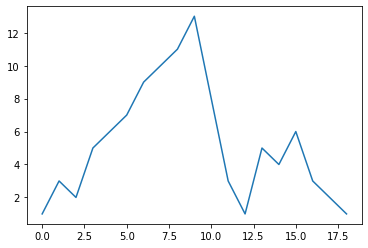

In [4]:
import matplotlib.pyplot as plt

plt.plot(delta_s)


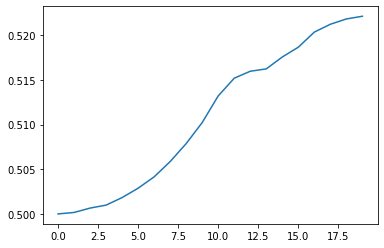

In [9]:
plt.plot(alpha)
